# C
## Inteligência  Computacional

## Motivação:

Inteligência Artificial pode ser aplicada de diversas formas para ajudar no desenvolvimento sustentável do planeta. Dentro da problemática do consumo de água, as etapas de tratamento para consumo são de grande importância. Nesta atividade iremos pensar formas de utilizar Inteligência Artificial para aumentar a eficiência do sistema de água. 


## Objetivo:

Desenvolver soluções para evitar o desperdício de água.


## Dataset:

 temos dados reais de sensores de bombas em uma estação de tratamento/distribuição de água. O conjunto de bombas pode operar em diferentes situações, algumas delas não desejadas. Quando as bombas estão em operação anormal, a distribuição de água pode ser interrompida e/ou danos podem ocorrer a estação, prejudicando o abastecimento de água para as pessoas e aumentando os custos de manutenção e da água que pode ser desperdiçada durante esse ocorrido.  

arquivo **pump_sensors.csv** com dados de oito sensores e um status de operação do conjunto de bombas.





In [32]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt  
import seaborn as sns

In [33]:

dados0 = pd.read_csv('datasets/pump_sensors.csv', sep=',') 
dados = dados0.dropna(axis='index')

In [35]:
# numero de classes no dataframe e quantas exemplos existem por classe

classes = dados['machine_status'].unique()
num_exemplos_por_classe = dados['machine_status'].value_counts()

print("Classes:", classes)
print("Número de exemplos por classe:")
print(num_exemplos_por_classe)

Classes: ['WORKING' 'ABNORMAL']
Número de exemplos por classe:
WORKING     205067
ABNORMAL      8404
Name: machine_status, dtype: int64


In [36]:
# Calculo das estatísticas (mediana, max, min, desvio padrão e média) dos dados agrupados por classe

#max, min, desvio padrão e média
estatisticas_por_classe = dados.groupby('machine_status').describe().transpose()

print(estatisticas_por_classe)

#mediana
mediana_por_classe= dados.groupby('machine_status').median().transpose()
print(mediana_por_classe)


machine_status      ABNORMAL        WORKING
sensor_01 count  8404.000000  205067.000000
          mean     40.947235      48.179641
          std       3.727914       2.242105
          min      35.807289       0.000000
          25%      37.977430      46.701390
...                      ...            ...
sensor_08 min      24.739580      27.604166
          25%      28.906248      46.093750
          50%      31.770832      49.739580
          75%      38.802082      53.906250
          max     417.708300     408.593700

[64 rows x 2 columns]


In [39]:
from sklearn.model_selection import train_test_split




# Escolhendo as colunas preditivas e alvo
x = dados.drop(columns = 'machine_status') 
y = dados['machine_status']                # Classe alvo

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 8 ,stratify=y)

In [41]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Instanciando o Escalonador
scaler = StandardScaler()
scaler = MinMaxScaler()

# Treinando o escalonador
scaler.fit(x_train)

# Usando o escalonador treinado para transformar os dados
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()  # Criamos o objeto do classificador 

knn.fit(x_train_scaled, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

KNeighborsClassifier()

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.metrics import cohen_kappa_score, roc_auc_score, roc_curve


y_predicoes = knn.predict(x_test_scaled) 

In [ ]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes,
                                   labels=['WORKING','ABNORMAL'])

# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['WORKING','ABNORMAL'])
disp.plot(values_format='d') 

In [ ]:
print(classification_report(y_test, y_predicoes))

In [ ]:
# Escolhendo as colunas preditivas e alvo novamente 
x = dados.drop(columns = ['machine_status','sensor_08','sensor_07','sensor_06','sensor_05','sensor_04']) 
y = dados['machine_status']                # Classe alvo

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5 , random_state = 50)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Instanciando o Escalonador
#scaler = StandardScaler()
scaler = MinMaxScaler()

# Treinando o escalonador
scaler.fit(x_train)

# Usando o escalonador treinado para transformar os dados
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()  # Criamos o objeto do classificador (não mudamos nenhum hiperpârametro)

knn.fit(x_train_scaled, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamen

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.metrics import cohen_kappa_score, roc_auc_score, roc_curve
y_predicoes = knn.predict(x_test_scaled) 

In [ ]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes,
                                   labels=['WORKING','ABNORMAL'])

# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['WORKING','ABNORMAL'])
disp.plot(values_format='d') 

In [ ]:
print(classification_report(y_test, y_predicoes))

In [ ]:
# Selecionando os sensores escolhidos na questão 3
sensores_escolhidos = ['sensor_01', 'sensor_02', 'sensor_03']

# Criando a série temporal de cada sensor
for sensor in sensores_escolhidos:
    plt.figure(figsize=(10, 5))
    plt.plot(dados[sensor])
    plt.title(f'Série Temporal - {sensor}')
    plt.xlabel('Amostras')
    plt.ylabel('Valor do Sensor')
    plt.show()

# Criando a matriz de correlação
sensores_correlacao = dados[sensores_escolhidos]
matriz_correlacao = sensores_correlacao.corr()

# Plotando a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

### ***Ao analisar os valores do sensor_01 e do sensor_02, observamos que quando o sensor_02 registra leituras abaixo da média existe uma  baixa correlação entre eles . Nesse caso, a matriz de correlação entre os dois sensores é de 0.5. No entanto, quando comparamos o sensor_02 e o sensor_03, notamos uma forte correlação entre eles quando o sensor_02 apresenta leituras abaixo da média. Isso significa que o sensor_03 também registra valores semelhantes nessas circunstâncias. Nesse caso, a matriz de correlação entre eles é próxima de 0.9, indicando um alto nível de correlação positiva.***

# **Para explorar outras possibilidades de utilização dos dados provenientes dos sensores da estação de tratamento de água, podemos empregar uma técnica de agrupamento com o intuito de identificar padrões ou grupos semelhantes nos conjuntos de dados. A aplicação do algoritmo de agrupamento K-means é uma alternativa viável para essa tarefa.**

# **O algoritmo K-means se baseia nos valores dos sensores para atribuir cada amostra a um grupo específico. Essa abordagem é valiosa na identificação de distintos comportamentos das bombas, tais como operação normal, operação anormal ou falhas específicas.**


In [24]:


from sklearn.cluster import KMeans

# Escolhendo as colunas preditivas


X = dados[['sensor_01', 'sensor_02', 'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08']]

# Instanciando o modelo de agrupamento K-means
kmeans = KMeans(n_clusters=3, random_state=42)

# Realizando o agrupamento
labels = kmeans.fit_predict(X)

# Adicionando as labels dos grupos ao dataframe de dados
dados['grupo'] = labels


# Criando um dicionário para mapear os nomes dos grupos
nomes_grupos = {0: "Grupo 1", 1: "Grupo 2", 2: "Grupo 3"}

# Adicionando a coluna com os nomes dos grupos
dados['nome_grupo'] = dados['grupo'].map(nomes_grupos)

# Verificando os nomes dos grupos atribuídos
print(dados['nome_grupo'].value_counts())



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Grupo 1    178227
Grupo 2     25249
Grupo 3      9995
Name: nome_grupo, dtype: int64


<ipython-input-25-7008b7450835>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  valores_medios = dados.groupby('nome_grupo').mean()


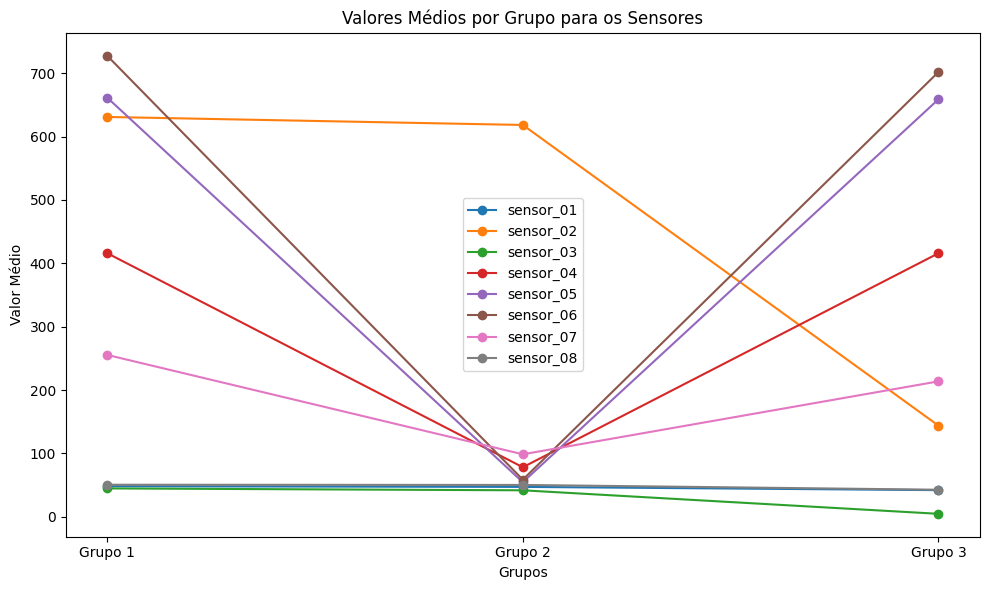

In [25]:

# Calcular os valores médios para cada sensor e grupo
valores_medios = dados.groupby('nome_grupo').mean()

# Obter os rótulos dos sensores
sensores = ['sensor_01', 'sensor_02', 'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08']

# Plotar o gráfico
fig, ax = plt.subplots(figsize=(10, 6))

for sensor in sensores:
    valores = valores_medios[sensor]
    ax.plot(valores, marker='o', label=sensor)

ax.set_xticks(range(len(valores_medios)))
ax.set_xticklabels(valores_medios.index)
ax.set_xlabel('Grupos')
ax.set_ylabel('Valor Médio')
ax.set_title('Valores Médios por Grupo para os Sensores')
ax.legend()

plt.tight_layout()
plt.show()


# **Ao analisar o gráfico "Valores Médios por Grupo para os Sensores", podemos observar que o grupo 1 serve como referência para comparar o comportamento dos mesmos sensores nos grupos 2 e 3. Nesse sentido, é possível notar uma queda nos valores médios dos sensores 04, 05, 06 e 07 no grupo 2, indicando que os valores lidos por esses sensores estão abaixo da média.**

# **Além disso, podemos constatar que, em comparação com o grupo 1, o grupo 3 apresenta valores médios de leitura bastante próximos. No entanto, o sensor 02 se destaca como tendo um comportamento anormal dentro desse grupo. Dessa forma, os dados desse grupo sugerem um eventual mal funcionamento do sensor 02.**

In [26]:
# Calcular a média dos dados por grupo
media_por_grupo = dados.groupby('grupo').mean()

# Imprimir a média dos dados de cada grupo
print("Média dos dados por grupo:")
print(media_por_grupo)

Média dos dados por grupo:
       sensor_01   sensor_02  sensor_03   sensor_04   sensor_05   sensor_06  \
grupo                                                                         
0      48.308274  630.845788  44.852908  415.947922  661.319759  727.407187   
1      47.256611  618.195852  41.884985   78.253214   54.697437   58.673071   
2      42.136475  143.937640   4.789208  415.824158  658.606089  701.708425   

        sensor_07  sensor_08  
grupo                         
0      255.440581  50.665719  
1       98.691484  50.334087  
2      213.729446  42.763828  


<ipython-input-26-ffcf918a5d2b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  media_por_grupo = dados.groupby('grupo').mean()


# **Ao analisarmos as médias de cada sensor nos respectivos grupos, observamos que o sensor 01e o sensor 08  não apresentam mudanças significativas de valor entre os grupos. Isso sugere que esses sensores exibem um comportamento anormal, mas não conclusivo em relação ao seu funcionamento adequado.**

# **Agora vamos realizar a transposição dos dados para que possamos agrupar nossos sensores em períodos específicos de tempo. Isso nos permitirá identificar se houve alguma atividade de falha geral em momentos específicos e, assim, analisar com mais precisão o funcionamento dos sensores.**

In [27]:
dados0 = pd.read_csv('datasets/pump_sensors.csv', sep=',') 
dados = dados0.dropna(axis='index')
dados1 = dados.drop(columns = ['machine_status'])
dados2 = dados1.transpose()
dados4 = dados1.drop(columns = ['sensor_01', 'sensor_02', 'sensor_03','sensor_08']) # grupo de dados que possui apenas os sensores de 04 a 07 sendo esses que apresentam falha  em conujuto em alguns momentos , como por exemplo no mommento de leitura : 60000
dados5 = dados4.transpose()

dados2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, sensor_01 to sensor_08
Columns: 213471 entries, 0 to 213470
dtypes: float64(213471)
memory usage: 13.0+ MB


In [28]:


from sklearn.cluster import KMeans

# Escolhendo as colunas preditivas


 X = dados[['sensor_01', 'sensor_02', 'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08']]

# Instanciando o modelo de agrupamento K-means
kmeans = KMeans(n_clusters=3, random_state=42)

# Realizando o agrupamento
labels = kmeans.fit_predict(dados2)#

# Adicionando as labels dos grupos ao dataframe de dados
dados2['grupo'] = labels


# Criando um dicionário para mapear os nomes dos grupos
nomes_grupos = {0: "Grupo 1", 1: "Grupo 2", 2: "Grupo 3"}

# Adicionando a coluna com os nomes dos grupos
dados2['nome_grupo'] = dados2['grupo'].map(nomes_grupos)

# Verificando os nomes dos grupos atribuídos
print(dados2['nome_grupo'].value_counts())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Grupo 3    3
Grupo 2    3
Grupo 1    2
Name: nome_grupo, dtype: int64


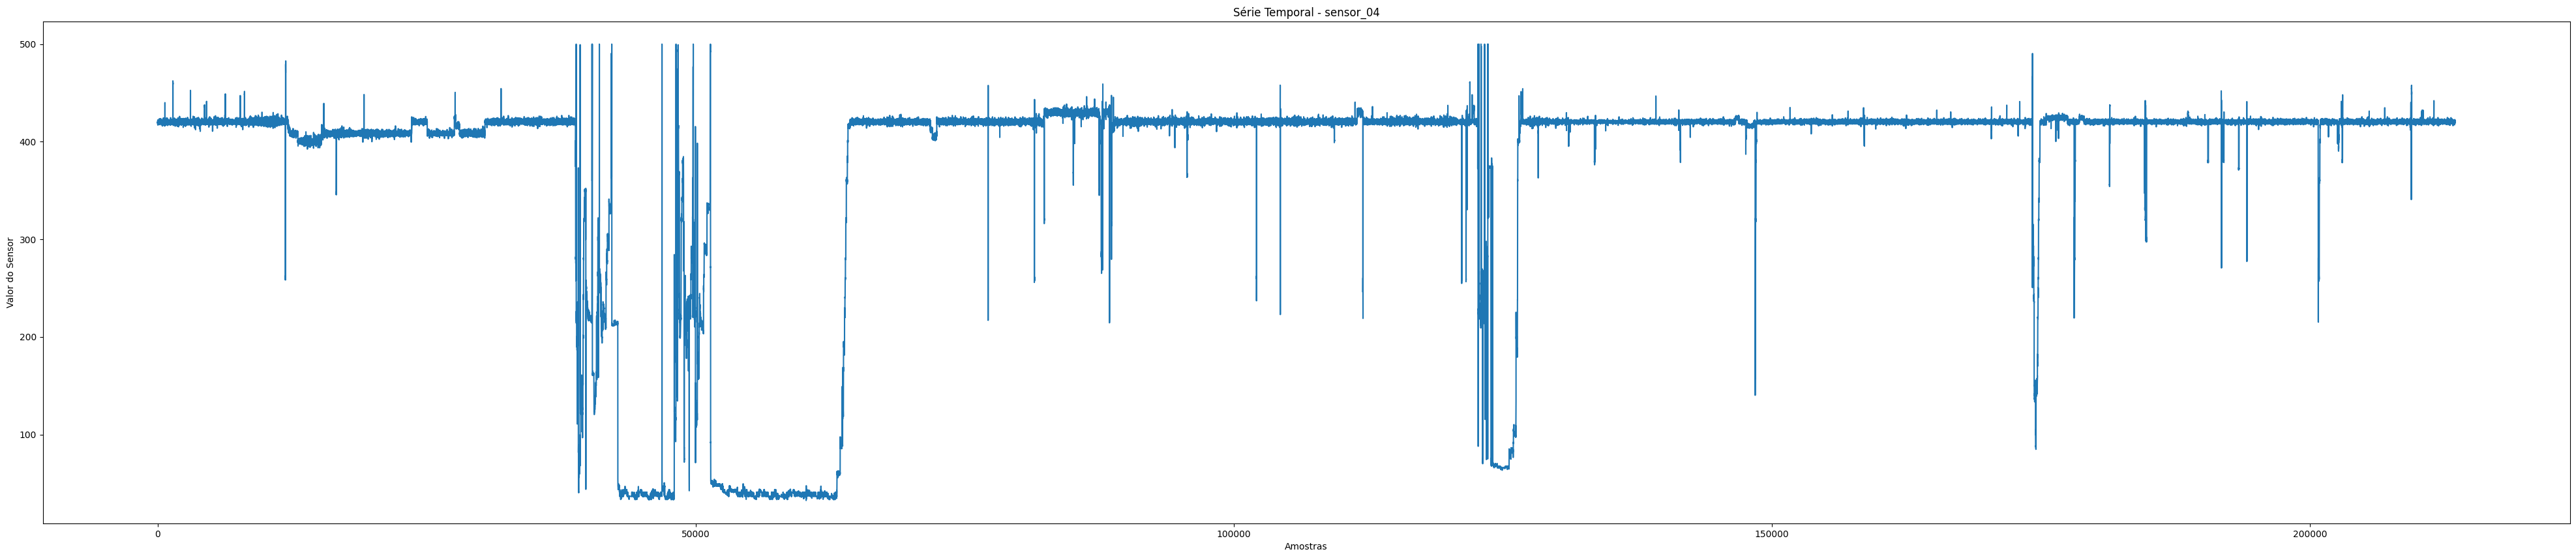

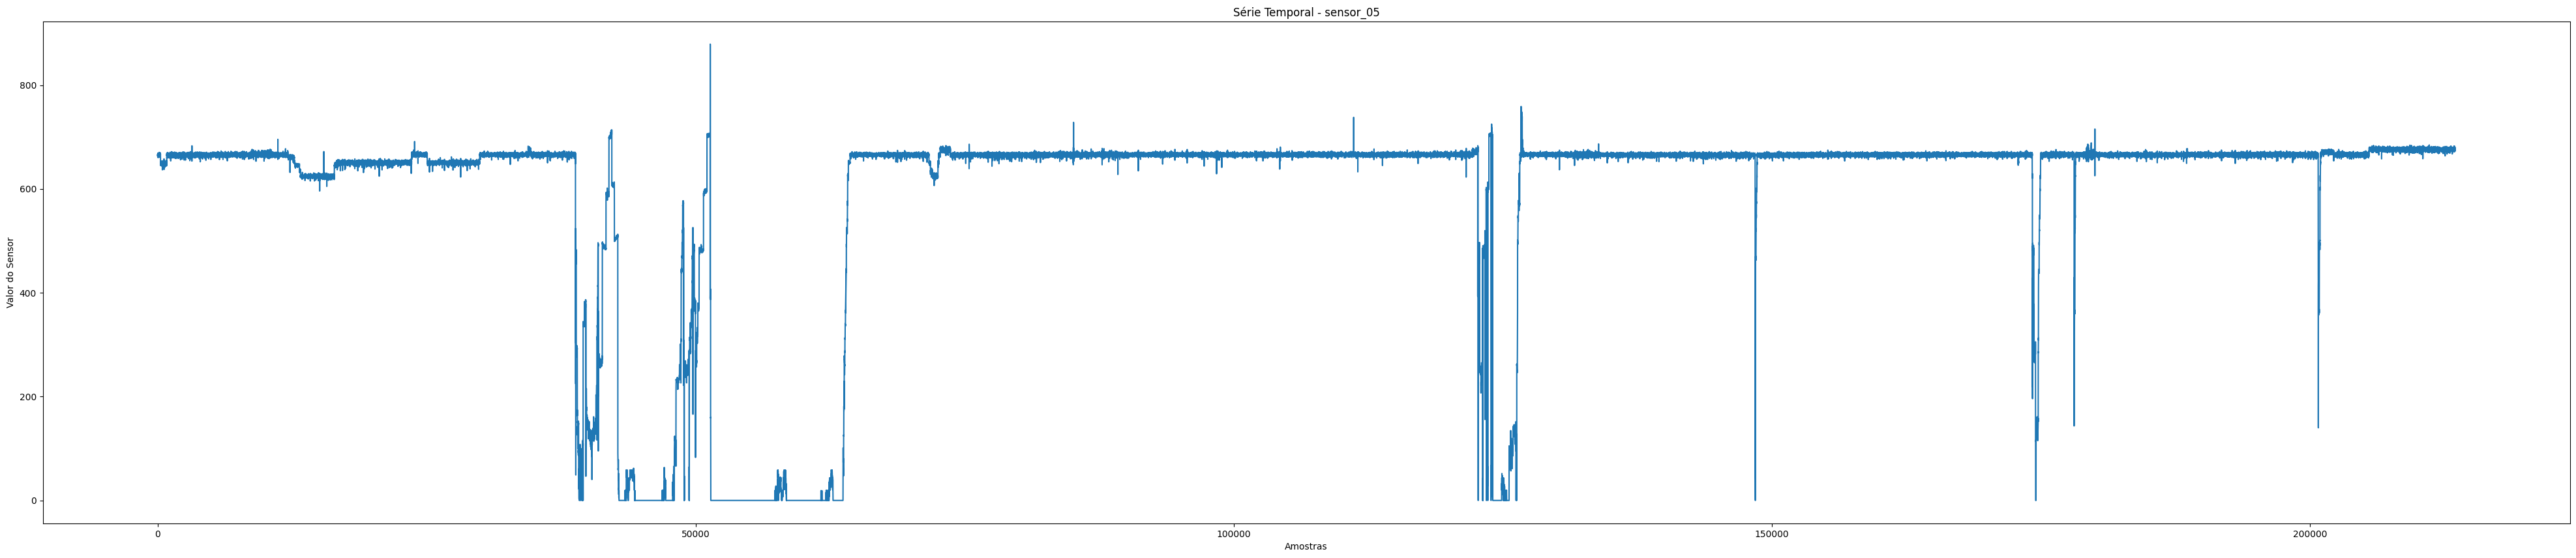

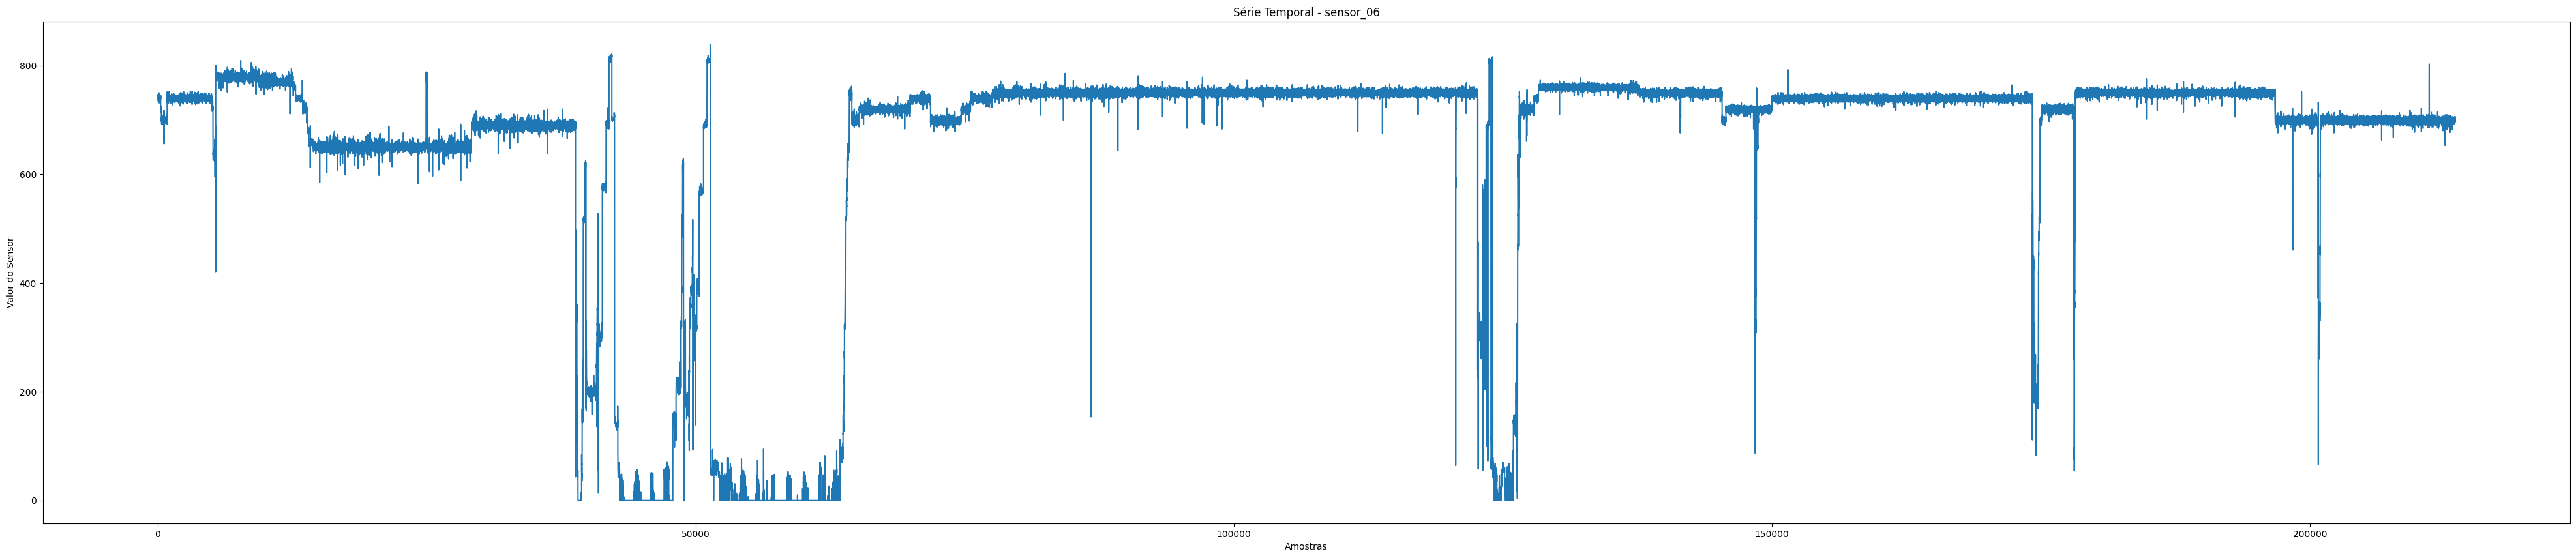

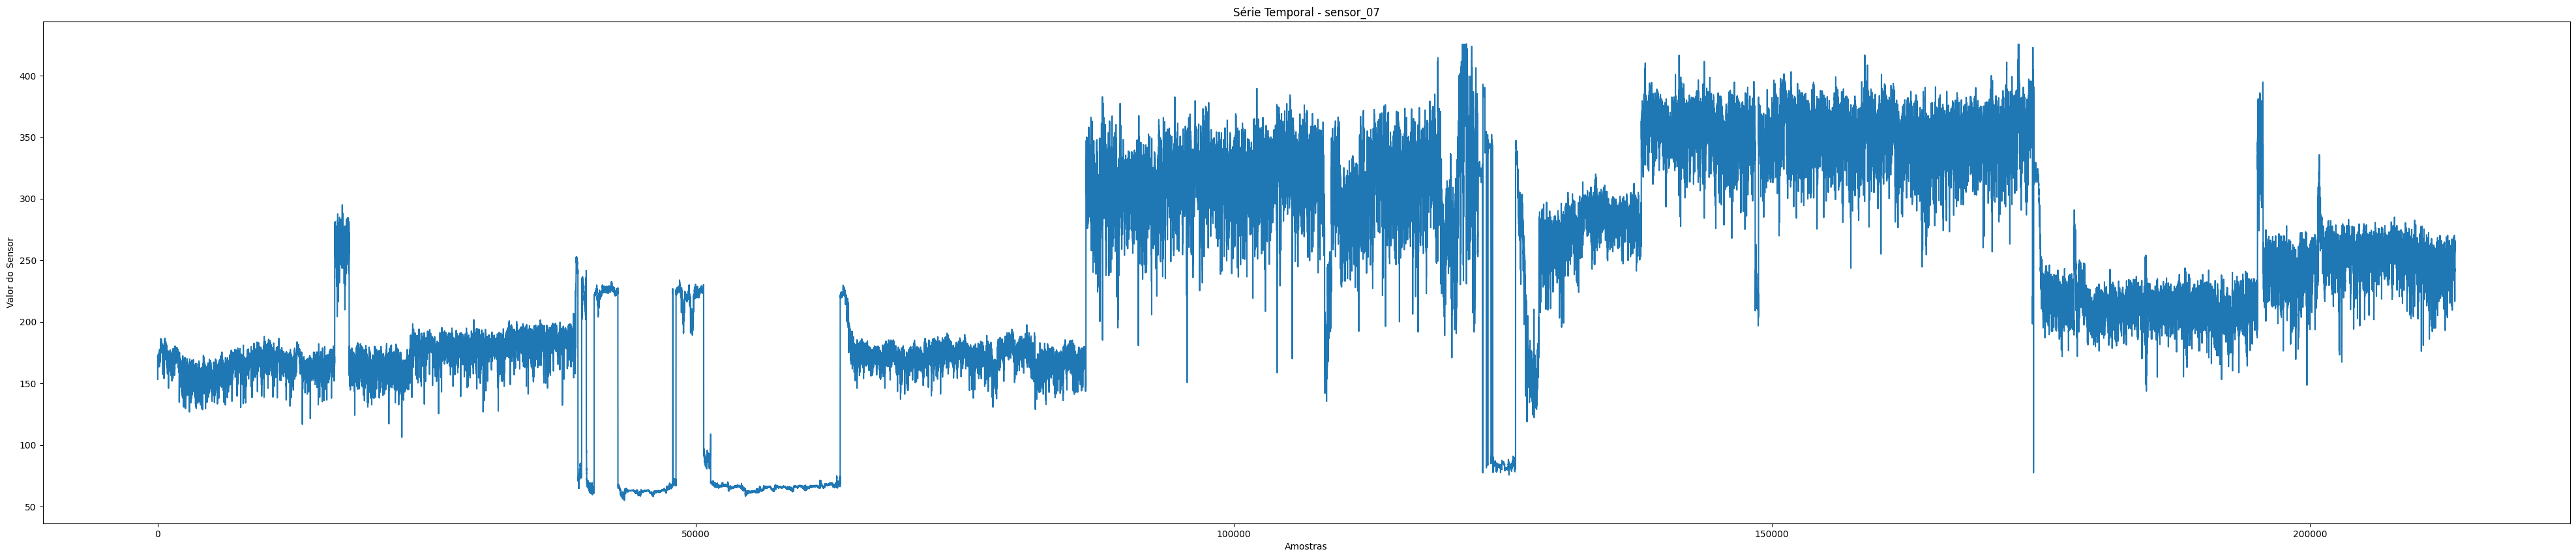

In [29]:
sensores_escolhidos = [   'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07']

# Criando a série temporal de cada sensor
for sensor in sensores_escolhidos:
    plt.figure(figsize=(50, 10))
    plt.plot(dados[sensor])
    plt.title(f'Série Temporal - {sensor}')
    plt.xlabel('Amostras')
    plt.ylabel('Valor do Sensor')
    plt.show()



In [30]:


from sklearn.cluster import KMeans

# Escolhendo as colunas preditivas



# Instanciando o modelo de agrupamento K-means
kmeans = KMeans(n_clusters=3, random_state=42)

# Realizando o agrupamento
labels = kmeans.fit_predict(dados5)#

# Adicionando as labels dos grupos ao dataframe de dados
dados5['grupo'] = labels


# Criando um dicionário para mapear os nomes dos grupos
nomes_grupos = {0: "Grupo 1", 1: "Grupo 2", 2: "Grupo 3"}

# Adicionando a coluna com os nomes dos grupos
dados5['nome_grupo'] = dados5['grupo'].map(nomes_grupos)

# Verificando os nomes dos grupos atribuídos
print(dados5['nome_grupo'].value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Grupo 1    2
Grupo 2    1
Grupo 3    1
Name: nome_grupo, dtype: int64


In [31]:
#utilizando metodo describe para ver o comportamento dos sensores agrupados por momentos 
dados5.groupby('nome_grupo')[60000].describe()



,count,mean,std,min,25%,50%,75%,max
nome_grupo,,,,,,,,
Grupo 1,2.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Grupo 2,1.0,36.583561,NaN,36.583561,36.583561,36.583561,36.583561,36.583561
Grupo 3,1.0,66.159860,NaN,66.159860,66.159860,66.159860,66.159860,66.159860


# **Ao analisarmos os sensores 04, 05, 06 e 07 no instante de leitura 60000, observamos que dois sensores não registraram leituras e os outros dois apresentaram leituras significativamente abaixo da média. Portanto, podemos concluir que houve uma falha geral de leitura nos dados nesse conjunto de sensores durante o período de tempo analisado.**